## Yolov5 for pool detection
Rearrange the provided data in the format expected by yolo train.py
Creating an 80-20 train-valid dataset.

Useful links
* https://www.gitmemory.com/issue/ultralytics/yolov5/36/712836418

In [1]:
from glob import glob
import base64
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import random
import numpy as np
import cv2
import requests
import os
import shutil
# from tensorflow.keras.preprocessing import image 
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif')
import torch
import sys
sys.path.insert(1, "yolov5")
from io import BytesIO
import json
%matplotlib inline

### Rearrange based on yolo v5 directory structure

In [2]:
current_directory = os.getcwd()
os.makedirs(os.path.join(current_directory, r"pool/images/train"))
os.makedirs(os.path.join(current_directory,r"pool/images/valid"))
os.makedirs(os.path.join(current_directory,r"pool/labels/train"))
os.makedirs(os.path.join(current_directory,r"pool/labels/valid"))

In [6]:
folders = ["swimming_pools/chips_gordon_19", "swimming_pools/near_burwood_chips_640x640"]

In [7]:
for folder in folders:
    img_list = glob(f"{folder}/*.tif")
    print(f"{len(img_list)} images in {folder}")
    for image_path in img_list:
        file_name = os.path.splitext(image_path)[0].split("\\")[-1]
        label_path = f"{folder}_labels/{file_name}.txt"

        new_image_path = f"pool/images/train/{file_name}.tif"
        new_label_path = f"pool/labels/train/{file_name}.txt"
        if random.random()< 0.2:
            new_image_path = f"pool/images/valid/{file_name}.tif"
            new_label_path = f"pool/labels/valid/{file_name}.txt"

        shutil.move(image_path, new_image_path)
        if os.path.exists(label_path):
            shutil.move(label_path, new_label_path)

90 images in swimming_pools/chips_gordon_19
142 images in swimming_pools/near_burwood_chips_640x640


### Explore train data
Plot a few images and the respective bounding boxes

In [15]:
folder = "pool/images/train/"
img_list = glob(f"{folder}/*.tif")
image_path = random.choice(img_list)
file_name = os.path.splitext(image_path)[0].split("\\")[-1]
label_path = f"pool/labels/train/{file_name}.txt"

In [16]:
f = open(label_path, "r")
lines = f.readlines()
lines = [line.rstrip() for line in lines]
coords =  [line.split(" ") for line in lines]
coords

[['0', '0.080469', '0.892188', '0.035937', '0.050000'],
 ['0', '0.385156', '0.907813', '0.039062', '0.062500'],
 ['0', '0.548438', '0.946875', '0.096875', '0.040625'],
 ['0', '0.820312', '0.483594', '0.056250', '0.042188'],
 ['0', '0.627344', '0.459375', '0.048438', '0.050000'],
 ['0', '0.299219', '0.403906', '0.060937', '0.070312'],
 ['0', '0.235156', '0.404687', '0.039062', '0.056250']]

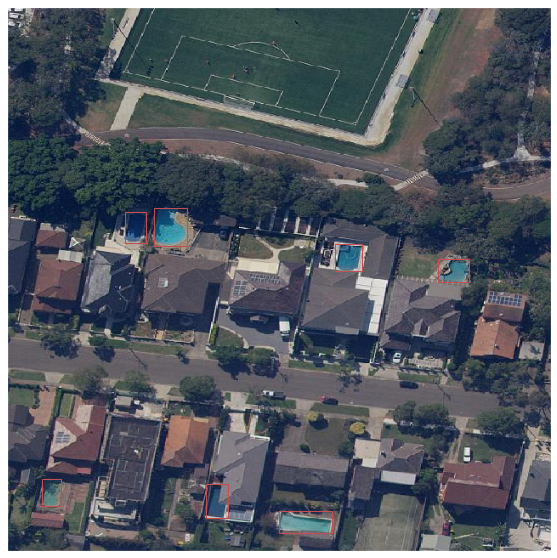

In [17]:
# Display the image
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.xticks([])
plt.yticks([])
img = Image.open(image_path)
ax.imshow(img)
w, h = img.size
for coord in coords:
    x = w*float(coord[1])
    y = h*float(coord[2])
    width = w*float(coord[3])
    height = h*float(coord[4])
    x = x-width/2
    y = y-height/2
    plt.gca().add_patch(Rectangle((x, y), width, height,
                                  linewidth=1, edgecolor='r', facecolor='none'))